In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *

In [5]:
import seaborn as sns
import pandas as pd
import torch 
import torch.nn as nn
import torch.nn.functional as F
import fastai.tabular.all as ft
from torch.utils.data import Dataset, DataLoader

Data: https://www.kaggle.com/manjeetsingh/retaildataset 

In [6]:
stores = pd.read_csv('/content/stores data-set.csv')

In [7]:
display(stores.head(3) )
stores.Store.unique()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [8]:
stores.set_index('Store', inplace=True)
stores.head(3)

,Type,Size
Store,,
1,A,151315
2,A,202307
3,B,37392


In [9]:
sales = pd.read_csv('/content/sales data-set.csv',)

In [10]:
display(sales.head(3))
sales.Store.unique()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [11]:
sales.set_index('Store',inplace=True)

In [12]:
sales.Date = pd.to_datetime(sales.Date, errors='coerce')

In [13]:
sales.head(3)

,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,
1,1,2010-05-02,24924.50,False
1,1,2010-12-02,46039.49,True
1,1,2010-02-19,41595.55,False


In [14]:
features = pd.read_csv('/content/Features data set.csv')
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [15]:
features.Date = pd.to_datetime(features.Date, errors='coerce')

In [16]:
features.set_index('Store',inplace=True)
features.head(5)

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,,,,,,,,,,,
1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
features.columns

Index(['Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [18]:
features.drop(['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5'],axis=1,inplace=True)

In [19]:
features.head(3)

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Store,,,,,,
1,2010-05-02,42.31,2.572,211.096358,8.106,False
1,2010-12-02,38.51,2.548,211.242170,8.106,True
1,2010-02-19,39.93,2.514,211.289143,8.106,False


## Join DataFrames


In [20]:
print(sales.index.unique())
print(stores.index.unique())
print(features.index.unique())

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
           dtype='int64', name='Store')
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
           dtype='int64', name='Store')
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
           dtype='int64', name='Store')


In [21]:
display(stores.head(3))
print(stores.shape)

display(sales.head(3))
print(sales.shape)

display(features.head(3))
print(features.shape)

,Type,Size
Store,,
1,A,151315
2,A,202307
3,B,37392


(45, 2)


,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,
1,1,2010-05-02,24924.50,False
1,1,2010-12-02,46039.49,True
1,1,2010-02-19,41595.55,False


(421570, 4)


,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Store,,,,,,
1,2010-05-02,42.31,2.572,211.096358,8.106,False
1,2010-12-02,38.51,2.548,211.242170,8.106,True
1,2010-02-19,39.93,2.514,211.289143,8.106,False


(8190, 6)


In [22]:
tmp = pd.concat([stores, sales], axis=1)

In [31]:
tmp = tmp.reset_index().set_index(['Store','Date'])

In [34]:
tmp

Type    Size  Dept  Weekly_Sales  IsHoliday
Store Date                                                  
1     2010-05-02    A  151315     1      24924.50      False
      2010-12-02    A  151315     1      46039.49       True
      2010-02-19    A  151315     1      41595.55      False
      2010-02-26    A  151315     1      19403.54      False
      2010-05-03    A  151315     1      21827.90      False
...               ...     ...   ...           ...        ...
45    2012-09-28    B  118221    98        508.37      False
      2012-05-10    B  118221    98        628.10      False
      2012-12-10    B  118221    98       1061.02      False
      2012-10-19    B  118221    98        760.01      False
      2012-10-26    B  118221    98       1076.80      False

[421570 rows x 5 columns]

In [32]:
tmp2 = features.reset_index().set_index(['Store','Date'])

In [35]:
tmp2

Temperature  Fuel_Price         CPI  Unemployment  IsHoliday
Store Date                                                                    
1     2010-05-02        42.31       2.572  211.096358         8.106      False
      2010-12-02        38.51       2.548  211.242170         8.106       True
      2010-02-19        39.93       2.514  211.289143         8.106      False
      2010-02-26        46.63       2.561  211.319643         8.106      False
      2010-05-03        46.50       2.625  211.350143         8.106      False
...                       ...         ...         ...           ...        ...
45    2013-06-28        76.05       3.639         NaN           NaN      False
      2013-05-07        77.50       3.614         NaN           NaN      False
      2013-12-07        79.37       3.614         NaN           NaN      False
      2013-07-19        82.84       3.737         NaN           NaN      False
      2013-07-26        76.06       3.804         NaN           NaN      False

[8190 rows x 5 columns]

In [36]:
df = tmp.merge(tmp2, on=['Store','Date'])

In [37]:
df

Type    Size  Dept  Weekly_Sales  IsHoliday_x  Temperature  \
Store Date                                                                    
1     2010-05-02    A  151315     1      24924.50        False        42.31   
      2010-05-02    A  151315     2      50605.27        False        42.31   
      2010-05-02    A  151315     3      13740.12        False        42.31   
      2010-05-02    A  151315     4      39954.04        False        42.31   
      2010-05-02    A  151315     5      32229.38        False        42.31   
...               ...     ...   ...           ...          ...          ...   
45    2012-10-26    B  118221    93       2487.80        False        58.85   
      2012-10-26    B  118221    94       5203.31        False        58.85   
      2012-10-26    B  118221    95      56017.47        False        58.85   
      2012-10-26    B  118221    97       6817.48        False        58.85   
      2012-10-26    B  118221    98       1076.80        False        58.85   

                  Fuel_Price         CPI  Unemployment  IsHoliday_y  
Store Date                                                           
1     2010-05-02       2.572  211.096358         8.106        False  
      2010-05-02       2.572  211.096358         8.106        False  
      2010-05-02       2.572  211.096358         8.106        False  
      2010-05-02       2.572  211.096358         8.106        False  
      2010-05-02       2.572  211.096358         8.106        False  
...                      ...         ...           ...          ...  
45    2012-10-26       3.882  192.308899         8.667        False  
      2012-10-26       3.882  192.308899         8.667        False  
      2012-10-26       3.882  192.308899         8.667        False  
      2012-10-26       3.882  192.308899         8.667        False  
      2012-10-26       3.882  192.308899         8.667        False  

[421570 rows x 10 columns]

# Implementación CNN

In [39]:
# def error_l1(df, colA, colB): 
#   df = df.iloc[-(int(len(df)*0.1)):] # Es lo equivalente a lo que se hizo con daily-min-temperatures.csv
#   return np.mean(np.abs(df[colA]-df[colB]))

# def error_rmse(df, colA, colB):
#   df = df.iloc[-(int(len(df)*0.1)):] 
#   return np.sqrt(np.mean(np.square(df[colA]-df[colB])))

In [40]:
def L1_error(df_weekly_sales,df_prev_weekly_sales): 
  
  return np.mean(np.abs(df_weekly_sales-df_prev_weekly_sales))

def RMSE_error(df_weekly_sales,df_prev_weekly_sales):
  return np.sqrt(np.mean(np.square(df_weekly_sales-df_prev_weekly_sales)))

In [41]:
df.columns

Index(['Type', 'Size', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [43]:
df['prev_weekly_sales'] = df['Weekly_Sales'].shift(1)
print(df.shape)
df.head(3)

(421570, 11)


Type    Size  Dept  Weekly_Sales  IsHoliday_x  Temperature  \
Store Date                                                                    
1     2010-05-02    A  151315     1      24924.50        False        42.31   
      2010-05-02    A  151315     2      50605.27        False        42.31   
      2010-05-02    A  151315     3      13740.12        False        42.31   

                  Fuel_Price         CPI  Unemployment  IsHoliday_y  \
Store Date                                                            
1     2010-05-02       2.572  211.096358         8.106        False   
      2010-05-02       2.572  211.096358         8.106        False   
      2010-05-02       2.572  211.096358         8.106        False   

                  prev_weekly_sales  
Store Date                           
1     2010-05-02                NaN  
      2010-05-02           24924.50  
      2010-05-02           50605.27

In [45]:
(df.iloc[-(int(len(df)*0.1)):]['Weekly_Sales'])

Store  Date      
40     2012-05-25     1589.49
       2012-05-25    21015.24
       2012-05-25    57165.19
       2012-05-25    37338.18
       2012-05-25    89601.28
                       ...   
45     2012-10-26     2487.80
       2012-10-26     5203.31
       2012-10-26    56017.47
       2012-10-26     6817.48
       2012-10-26     1076.80
Name: Weekly_Sales, Length: 42157, dtype: float64

In [47]:
print("Error RMSE: ",RMSE_error(df.iloc[-(int(len(df)*0.1)):]['Weekly_Sales'],df.iloc[-(int(len(df)*0.1)):]['prev_weekly_sales']) )

Error RMSE:  19906.927237715237


In [57]:
df.reset_index(inplace=True)

In [58]:
df.head(3)

,Store,Date,Type,Size,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,prev_weekly_sales
0,1,2010-05-02,A,151315,2,50605.27,False,42.31,2.572,211.096358,8.106,False,24924.50
1,1,2010-05-02,A,151315,3,13740.12,False,42.31,2.572,211.096358,8.106,False,50605.27
2,1,2010-05-02,A,151315,4,39954.04,False,42.31,2.572,211.096358,8.106,False,13740.12


In [59]:
df.columns

Index(['Store', 'Date', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y',
       'prev_weekly_sales'],
      dtype='object')

In [98]:
def cargar_datos(df): 
  X = ft.range_of(df)
  valid_cut = len(df) - int(len(df)*0.1)
  src = ft.TabularPandas(df,
                         cont_names=['Store','Date', 'Type','Size','Dept','Temperature', 'Fuel_Price','CPI', 'Unemployment', 'prev_weekly_sales'],
                         y_names=['Weekly_Sales'],
                        splits = (X[:valid_cut], X[valid_cut:]))
  
  return src.dataloaders(bs=1024)
  dls = cargar_datos(df)

In [99]:
dls.one_batch()

(tensor([], size=(1024, 0), dtype=torch.int64),
 tensor([[4.0000e+00, 5.6000e+01, 4.3760e+01,  ..., 8.6230e+00, 2.0586e+05, 2.3423e+04],
         [1.6000e+01, 7.9000e+01, 4.1260e+01,  ..., 6.8420e+00, 5.7197e+04, 7.9606e+03],
         [3.9000e+01, 3.0000e+00, 7.3310e+01,  ..., 8.3000e+00, 1.8411e+05, 6.8114e+04],
         ...,
         [4.0000e+01, 7.1000e+01, 2.1640e+01,  ..., 5.2870e+00, 1.5508e+05, 7.4529e+03],
         [3.3000e+01, 4.0000e+00, 1.0014e+02,  ..., 9.4950e+00, 3.9690e+04, 1.9800e+02],
         [2.6000e+01, 2.2000e+01, 4.7110e+01,  ..., 7.4890e+00, 1.5251e+05, 5.1525e+03]]),
 tensor([[ 2744.0100],
         [ 4811.2598],
         [12396.6504],
         ...,
         [ 2323.5200],
         [ 5987.7598],
         [ 4684.6802]]))

In [100]:
def RMSE_loss(pred, targ): 
  return torch.sqrt(F.mse_loss(pred, targ))

In [101]:
learn = ft.tabular_learner(dls, layers=[128, 128], metrics=[F.l1_loss, RMSE_loss])

SuggestedLRs(valley=0.17378008365631104)

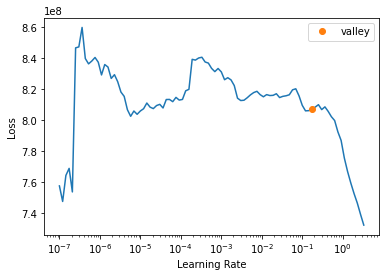

In [102]:
learn.lr_find()

In [104]:
learn.fit_one_cycle(7, 0.173)

epoch,train_loss,valid_loss,l1_loss,RMSE_loss,time
0,325786464.000000,217250896.000000,9115.641602,14489.640625,00:05
1,323606528.000000,240947664.000000,10607.354492,15307.039062,00:05
2,296705344.000000,226014784.000000,10348.346680,14769.331055,00:05
3,286849216.000000,275995840.000000,13990.659180,16525.414062,00:05
4,254429600.000000,183460048.000000,8908.220703,13274.941406,00:05
5,239513152.000000,182866752.000000,8736.887695,13248.454102,00:05
6,223872912.000000,152204752.000000,7883.353516,12144.904297,00:05


In [105]:
import statsmodels as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [106]:
week_trend, week_cycle = hpfilter(df['Weekly_Sales'], lamb=6.25)

In [107]:
df['weekly_cycle'] = week_cycle
df['weekly_trend'] = week_trend

In [108]:
df['EWMA'] = df['Weekly_Sales'].ewm(alpha=0.5).mean()

In [109]:
df.columns

Index(['Store', 'Date', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y',
       'prev_weekly_sales', 'weekly_cycle', 'weekly_trend', 'EWMA'],
      dtype='object')

In [121]:
def Load_data_statystical(df): 
  X = ft.range_of(df)
  valid_cut = len(df) - int(len(df)*0.1)
  src = ft.TabularPandas(df,
                         cont_names=list(['Store','Dept','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'prev_weekly_sales',
        'weekly_cycle', 'weekly_trend', 'EWMA']),
                         y_names=['Weekly_Sales'], 
                        splits = (X[:valid_cut], X[valid_cut:])) 
  
  return src.dataloaders(bs=1024)
dls_stats = Load_data_statystical(df)

In [123]:
learn_stats = ft.tabular_learner(dls_stats, layers=[128, 128], metrics=[F.l1_loss, RMSE_loss])

SuggestedLRs(valley=0.14454397559165955)

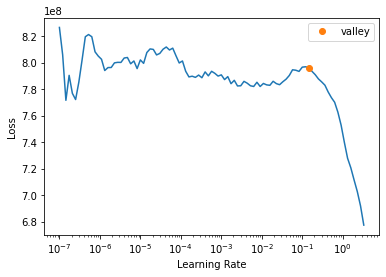

In [124]:
learn_stats.lr_find()

In [125]:
learn_stats.fit_one_cycle(7, 0.1445)

epoch,train_loss,valid_loss,l1_loss,RMSE_loss,time
0,85959128.000000,44371968.000000,6236.220703,6606.338379,00:05
1,5076524.000000,16108869.000000,3981.409912,4012.443359,00:05
2,5119029.500000,1032996672.000000,31992.648438,32134.367188,00:05
3,4506147.500000,9029807.000000,2959.957275,3004.469971,00:05
4,4689587.500000,5025207.000000,2201.787354,2241.115234,00:05
5,4050969.000000,13389318.000000,3562.696289,3650.583496,00:05
6,4455423.000000,171519.359375,280.516479,396.172821,00:05


# Implementación de RNN

In [ ]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday_sales', 'Year_sales',
       'Month_sales', 'Day_sales', 'Date_sales', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'IsHoliday_features', 'Year_features',
       'Month_features', 'Day_features', 'Date_features', 'Type', 'Size',
       'Date', 'ultima_weekly_sales', 'weekly_cycle', 'weekly_trend', 'EWMA'],
      dtype='object')

In [126]:
T = torch.tensor(df['Weekly_Sales'], dtype=torch.float32)

In [127]:
class KaggleDataset(Dataset):
  def __init__(self, T, max_window = 60):
    self.T = T 
    self.max_window = max_window 
    

  def __len__(self):
    return len(self.T)

  def __getitem__(self, i): 
    d = i-self.max_window 
    first = max(0,d)

    padding = -torch.ones((max(0, -d),))
    x = torch.cat((padding, self.T[first:i]), dim=0)
    y = self.T[i] 

    return x, y

# Modelo

In [128]:
class SimpleRNN(nn.Module):
  def __init__(self, hidden_size, num_layers):
    super().__init__()
    
    self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
    self.linear = nn.Linear(hidden_size, 1)

  def forward(self, x): 
    y, h_n = self.rnn(x[:, :, None]) 
    y = y[:, -1, :] 
    return self.linear(y).squeeze()

In [129]:
model = SimpleRNN(64, 2)

# Manual (con pytorch)

In [130]:
def RMSE_error(yp, y):
  w = (yp-y)
  return torch.sqrt((w*w).mean())

In [131]:
train_ds = KaggleDataset(T[:len(df)-5000], max_window=40)
valid_ds = KaggleDataset(T[len(df)-5000:], max_window=40)

In [132]:
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=256)

In [133]:
from torch import optim 
from fastprogress.fastprogress import progress_bar

optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 5

In [134]:
pb = progress_bar(range(epochs))
for epoch in pb: 
  for x, y in train_dl: 
    optimizer.zero_grad()
    yp = model(x)
    loss = F.mse_loss(yp, y)
    loss.backward()
    optimizer.step()
    pb.comment = f'loss: {loss.item():.3f}'

Validation

In [136]:
model.eval()
rmse_total = 0
for x, y in valid_dl:
  yp = model(x)
  rmse_total += RMSE_error(yp, y)

In [137]:
print(f'RMSE: {rmse_total/len(valid_dl)}')

RMSE: 17743.95703125


# Con Fastai

In [138]:
model = SimpleRNN(64, 2)

In [139]:
dls = ft.DataLoaders.from_dsets(train_ds, valid_ds, bs=256)

In [141]:
learn = ft.Learner(dls, model, opt_func=ft.ranger, loss_func=F.smooth_l1_loss, metrics=[F.l1_loss, RMSE_error])

In [142]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,l1_loss,RMSE_error,time
0,15976.220703,11574.095703,11574.595703,18077.691406,03:16


In [143]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,l1_loss,RMSE_error,time
0,16076.845703,11553.590820,11554.090820,18063.962891,02:27
1,16168.658203,11505.978516,11506.478516,18031.708984,01:28
2,15906.270508,11470.388672,11470.888672,18007.175781,01:39
3,15841.543945,11453.866211,11454.366211,17995.687500,01:42
4,15960.553711,11451.231445,11451.731445,17993.851562,01:26
